In [45]:
import numpy as np
import pandas as pd
import plotly.express as px
import yfinance as yf
from pyomo.environ import *

In [147]:
start_date = "2020-01-01" 
end_date = "2025-01-01"

[*********************100%***********************]  1 of 1 completed


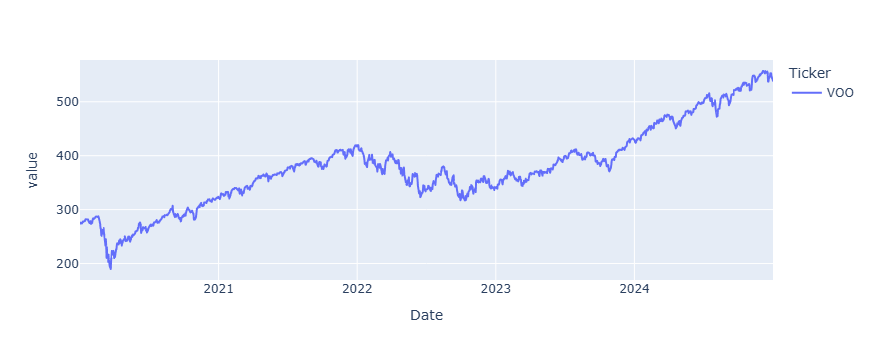

In [149]:
# Vanguard S&P 500 ETF
sp500_data = yf.download('VOO', start=start_date, end=end_date)['Close']
px.line(sp500_data)

[*********************100%***********************]  1 of 1 completed


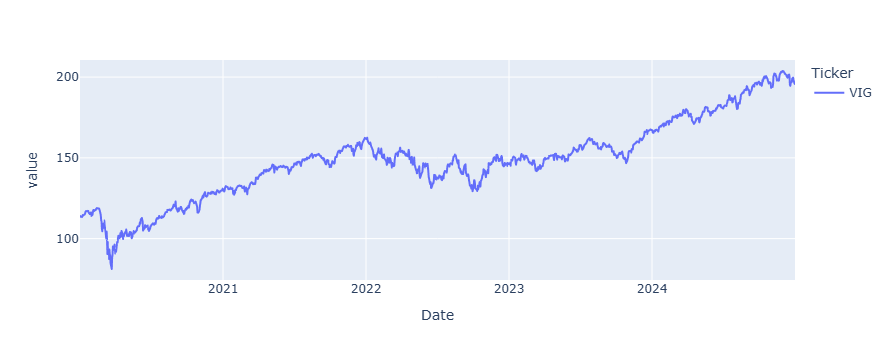

In [124]:
# Vanguard Dividend Appreciation ETF
divappr_data = yf.download('VIG', start=start_date, end=end_date)['Close']
px.line(divappr_data)

[*********************100%***********************]  1 of 1 completed


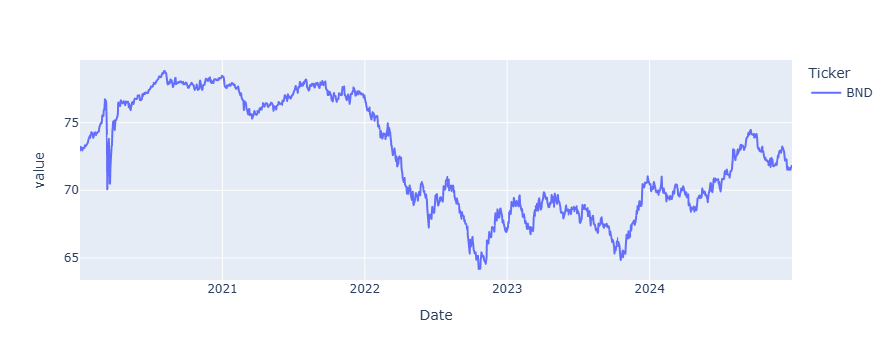

In [157]:
# Vanguard Growth ETF
growth_data = yf.download('BND', start=start_date, end=end_date)['Close']
px.line(growth_data)

In [110]:
# Vanguard Total Bond Market ETF
bond_data = yf.download('BND', start=start_date, end=end_date)['Close']
px.line(bond_data)

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


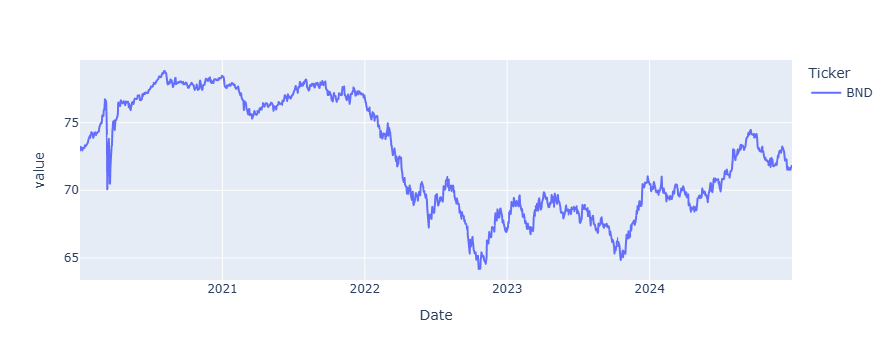

In [111]:
# Vanguard real estate etf
real_estate_data = yf.download('VNQ', start=start_date, end=end_date)['Close']
px.line(bond_data)

In [ ]:
tnx = yf.Ticker("^TNX")  # Yahoo Finance ticker for 10-year Treasury yield
yield_10_years = round(tnx.history(period="1d")['Close'].iloc[0]/100, 4)

In [132]:
def calculate_sharpe_ratio(prices_df, risk_free_rate=yield_10_years):
    """
    Calculate the Sharpe Ratio for a given set of index fund closing prices.
    """
    # Daily returns
    daily_returns = prices_df.pct_change().dropna()
    
    # Converting risk-free rate to daily (assuming 252 trading days)
    daily_risk_free_rate = (1 + risk_free_rate)**(1/252) - 1
    
    # Excess returns
    excess_returns = daily_returns - daily_risk_free_rate
    
    # Calculate Sharpe Ratio
    sharpe_ratios = excess_returns.mean() / excess_returns.std()
    
    # Annualize Sharpe Ratio (multiply by sqrt of trading days)
    annualized_sharpe = sharpe_ratios * np.sqrt(252)
    
    return annualized_sharpe.to_dict()

def plot_cumulative_returns(prices_df):
    # Calculate daily percentage change
    df_normalized = sp500_data.pct_change().dropna()  
    # Convert to cumulative return (starting at 1)
    df_cumulative = (1 + df_normalized).cumprod()  
    fig = px.line(df_cumulative, x=df_cumulative.index, y=df_cumulative.columns,
              labels={"value": "Cumulative Return", "index": "Date"})
    return fig

In [153]:
import plotly.express as px
import pandas as pd

def plot_normalized_returns_multi(*dfs, labels, title="Normalized Percentage Change of Multiple Assets"):
    """
    Plots normalized percentage change for multiple dataframes using the first column.

    Parameters:
    - *dfs (pd.DataFrame): Multiple DataFrames with date index and price columns.
    - labels (list): List of names corresponding to each DataFrame.
    - title (str): Title of the plot.

    Returns:
    - A Plotly line chart showing normalized percentage change for all assets.
    """
    normalized_dfs = []

    # Normalize each DataFrame separately
    for df, label in zip(dfs, labels):
        df = df.iloc[:, 0].pct_change().dropna()  # Use the first column (positional reference)
        df = (1 + df).cumprod() * 100  # Normalize: Start each asset at 100
        df = df.to_frame(name=label)  # Convert Series to DataFrame and rename column
        normalized_dfs.append(df)

    # Combine all DataFrames into one
    df_combined = pd.concat(normalized_dfs, axis=1)

    # Plot the combined DataFrame
    fig = px.line(df_combined, x=df_combined.index, y=df_combined.columns,
                  title=title, labels={"value": "Cumulative Return (Starting at 100)", "index": "Date"})
    
    fig.show()

# Example Usage:
# plot_normalized_returns_multi(df_index, df_treasury, labels=["S&P 500", "3M Treasury Yield"])


In [113]:
calculate_sharpe_ratio(sp500_data)

{'VOO': 0.5419050935484493}

In [126]:
dfs = [sp500_data, divappr_data, bond_data, real_estate_data]
for df in dfs:
    print(calculate_sharpe_ratio(df))
    

{'VOO': 0.5419050935484493}
{'VIG': 0.44726116738681726}
{'BND': -0.6060189188876861}
{'VNQ': 0.09229492795861834}


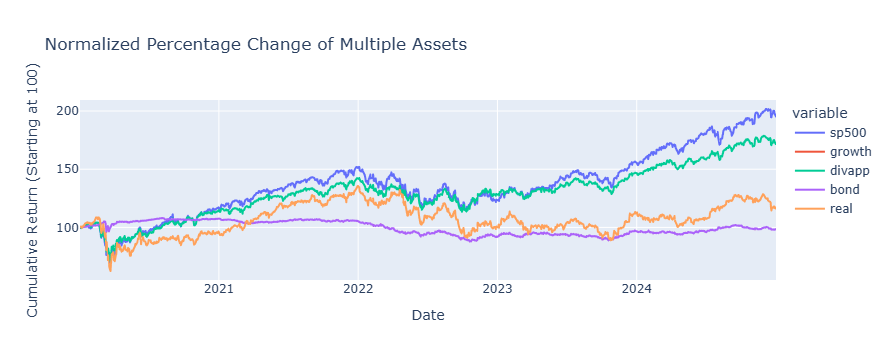

In [159]:
plot_normalized_returns_multi(sp500_data, growth_data, divappr_data, bond_data, real_estate_data,
                             labels=['sp500', 'growth', 'divapp', 'bond', 'real'])

In [143]:
sp500_data

Ticker,VOO
Date,
2020-01-02,276.115448
2020-01-03,274.098389
2020-01-06,275.125427
2020-01-07,274.366730
2020-01-08,275.782379
...,...
2024-12-24,552.820007
2024-12-26,552.809998
2024-12-27,547.080017
